In [1]:
#Libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import regex as re

#Dictionaries
#https://gist.github.com/sfirrin/fd01d87f022d80e98c37a045c14109fe
states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

# https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

#Training
df = pd.read_csv('Training_DataSet.csv')

#Testing
df_test = pd.read_csv('Test_DataSet.csv')

In [2]:
#Check for nas
df.isna().sum(axis = 0)

ListingID                 0
SellerCity                0
SellerIsPriv              0
SellerListSrc             2
SellerName                0
SellerRating              0
SellerRevCnt              0
SellerState               0
SellerZip                 2
VehBodystyle              0
VehCertified              0
VehColorExt              73
VehColorInt             728
VehDriveTrain           401
VehEngine               361
VehFeats                275
VehFuel                   2
VehHistory              201
VehListdays               2
VehMake                   0
VehMileage                2
VehModel                  0
VehPriceLabel           285
VehSellerNotes          243
VehType                   0
VehTransmission         197
VehYear                   0
Vehicle_Trim            405
Dealer_Listing_Price     52
dtype: int64

# EDA

In [3]:
#Cols
print(df.columns)

#Shape
print(df.shape)


Index(['ListingID', 'SellerCity', 'SellerIsPriv', 'SellerListSrc',
       'SellerName', 'SellerRating', 'SellerRevCnt', 'SellerState',
       'SellerZip', 'VehBodystyle', 'VehCertified', 'VehColorExt',
       'VehColorInt', 'VehDriveTrain', 'VehEngine', 'VehFeats', 'VehFuel',
       'VehHistory', 'VehListdays', 'VehMake', 'VehMileage', 'VehModel',
       'VehPriceLabel', 'VehSellerNotes', 'VehType', 'VehTransmission',
       'VehYear', 'Vehicle_Trim', 'Dealer_Listing_Price'],
      dtype='object')
(6298, 29)


In [4]:
#Check for distribution in columns
for i in df.columns:
    print('-------------------')
    print(i)
    if df[i].nunique() > 2000:
        print("Check Manually")
        pass
    else:
        
        print('Unique: ', df[i].nunique())
        print('Value Counts: ', df[i].value_counts())

-------------------
ListingID
Check Manually
-------------------
SellerCity
Unique:  1318
Value Counts:  Chicago         118
Battle Creek    103
Columbus         63
Louisville       59
Houston          53
               ... 
Verona            1
Shelton           1
Ontario           1
Bethlehem         1
Warrenton         1
Name: SellerCity, Length: 1318, dtype: int64
-------------------
SellerIsPriv
Unique:  2
Value Counts:  False    6284
True       14
Name: SellerIsPriv, dtype: int64
-------------------
SellerListSrc
Unique:  8
Value Counts:  Digital Motorworks (DMi)       3086
Inventory Command Center       1189
HomeNet Automotive             1037
Jeep Certified Program          709
Cadillac Certified Program      229
My Dealer Center                 29
Sell It Yourself                 14
Five Star Certified Program       3
Name: SellerListSrc, dtype: int64
-------------------
SellerName
Check Manually
-------------------
SellerRating
Unique:  40
Value Counts:  4.9    775
4.8    768


In [5]:
## Notes on features 


# ListingID - unique id, not useful for training

# Seller City - looks too diverse to be useful - remove

# Seller is private - bool, too imbalanced - remove

# SellerListSrc - good - group under 29 as "other", dummy vars

#Seller Name - too diverse - remove

#SellerRating - Good

#SellerRevCnt - Looks good - Needs to be binned

#SellerState - too diverse - group to region instead

#SellerZip - too diverse - info captured by region - remove 

#VehBodystyle - single class - remove 

#VehCertified - Good - indicator

#VehColorExt - Too many classes - group into standard colors 

#VehColorInt - Too many classes - group into standard colors 

#VehDriveTrain - Too many classes - group into 4WD/AWD or not

#VehEngine - too many classes - pull out liters and cylinders

#VehFeats - semi unstructured - TF-IDF for important words, sum values for single number

#VehHistory - pull out owner, non-personal, accidents and buyback - probably regex 

#VehListDays - good - log transform 

#VehMake - make bool - cadillac or not

#VehMileage - Good 

#VehModel - can be removed, information captured by vehmake

#VehPriceLabel - Make dummy 

#VehSellerNotes - Does not look useful - remove 

#VehType - single class - remove

#VehTransmission - Looks to mostly be 8 speed automatic or similar - remove

#VehYear - Good

#Vehicle_Trim - Lot of classes - too diverse for regression problem - remove 

In [6]:
#Seller Name

print(df.SellerName.nunique())

print(df.SellerName.value_counts())

#Too Diverse - remove

2452
Vroom (Online Dealer - Nationwide Delivery)                381
Carvana                                                    236
Henkel Chrysler Dodge Jeep Ram                             100
OffLeaseOnly.com The Nation&#x27;s Used Car Destination     37
Koons Tysons Chrysler Dodge Jeep RAM                        36
                                                          ... 
Ki-Po Chevrolet                                              1
Holz Chevrolet Buick GMC Cadillac                            1
Northside Ford Lincoln                                       1
Fort Wayne Toyota Lexus Kia                                  1
Bob Moore Chrysler Dodge Jeep Ram of Tulsa                   1
Name: SellerName, Length: 2452, dtype: int64


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


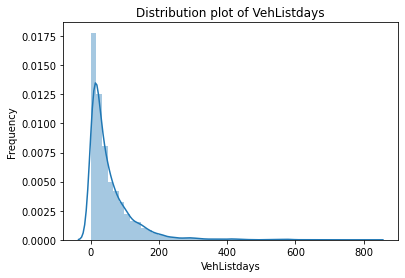

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


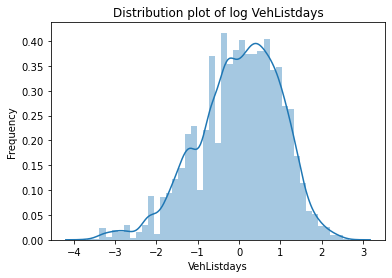

In [7]:
#Veh List Days 
#print(df.VehListdays)

fig, ax = plt.subplots()

sns.distplot(df.VehListdays)

plt.title('Distribution plot of VehListdays')
plt.xlabel('VehListdays')
plt.ylabel('Frequency')
plt.show()


#Skewed - log transform
veh_log = np.log(df.VehListdays)
data = (veh_log - veh_log.mean()) / veh_log.std()


sns.distplot(data)
# Set the title and axis labels
plt.title('Distribution plot of log VehListdays')
plt.xlabel('VehListdays')
plt.ylabel('Frequency')

plt.show()

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


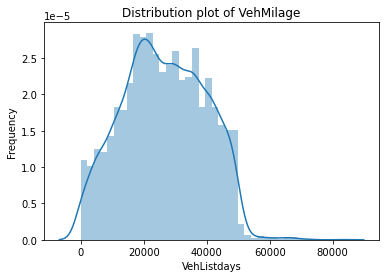

In [8]:
#Veh Mileage

fig, ax = plt.subplots()

sns.distplot(df.VehMileage)

plt.title('Distribution plot of VehMilage')
plt.xlabel('VehListdays')
plt.ylabel('Frequency')
plt.show()

# Looks okay

In [9]:
#Seller Notes
for i in range(0, 50):
    print('--------------------------------')
    print(i + 1,')', df.VehSellerNotes[i])

--------------------------------
1 ) nan
--------------------------------
2 ) Come take a look at our great pre-owned inventory at, www.gatewayfargo.com
--------------------------------
3 ) Backed by a rigorous 125-point inspection by factory-trained technicians and an additional (up to) 100,000 mile warranty, this CERTIFIED PRE-OWNED VEHICLE offers the PEACE OF MIND you&#x27;ve been searching for. ... Wilde is your one-stop shop for new Chrysler, Jeep, Dodge, Ram and SRT sales, used and certified pre-owned vehicle sales, service and parts in Southeastern Wisconsin. We are fully-stocked with hundreds of cars, trucks, mini-vans and SUVs for every budget. CALL our knowledgeable staff at 262-544-5400, learn more about us and VIEW OUR ENTIRE INVENTORY online at www.wildedodge.com or VISIT us in person, conveniently located at 1710 Hwy 164 in Waukesha, WI. We look forward to serving you! It is the policy of this dealership that prices are plus tax, tag, title, and Dealer Service Fee of $219

# Cleaning & Transformations

In [10]:
#Remove Features

cols_to_remove = ['SellerCity', 'SellerIsPriv', 'SellerName', 'SellerZip', 'VehBodystyle', 'VehModel', 
          'VehSellerNotes', 'VehType', 'VehTransmission']

df.drop(cols_to_remove, axis = 1, inplace = True)


#Drop in test set
df_test.drop(cols_to_remove, axis = 1, inplace = True)


In [11]:
# SellerListSrc - good - group under 29 as "other", dummy vars

#Group classes under 29 as "Other" in Train set
df.SellerListSrc.fillna('Other', inplace = True)
classes_under_29 = ['My Dealer Center', 'Sell It Yourself', 'Five Star Certified Program']
df.loc[df['SellerListSrc'].isin(classes_under_29), 'SellerListSrc'] = 'Other'


#Group classes under 29 as "Other" in Test set
df_test.loc[df['SellerListSrc'].isin(classes_under_29), 'SellerListSrc'] = 'Other'




#Create list of columns to dummies
cols_to_dummies = ['SellerListSrc']


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


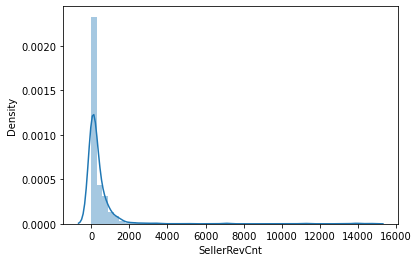

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


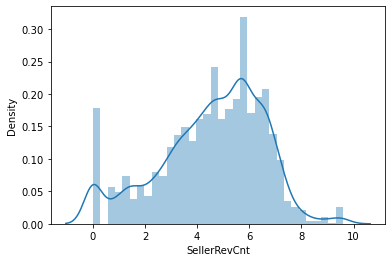

In [12]:
# SellerRevCnt

#Data is skewed
sns.distplot(df.SellerRevCnt + .01)
plt.show()

#Log Tranform
log_sellerRev = np.log(df.SellerRevCnt + .01)
log_sellerRev[log_sellerRev < 0] = 0
sns.distplot(log_sellerRev)


#Replace in Training Set 
df['SellerRevCnt'] = log_sellerRev


#Replace in Testing Set
log_sellerRev_test = np.log(df_test.SellerRevCnt + .01)
log_sellerRev_test[log_sellerRev_test < 0] = 0

df_test['SellerRevCnt'] = log_sellerRev_test

In [13]:
#SellerState 

#Train Set
df['State'] = df['SellerState'].map(abbrev_to_us_state)
df['Region'] = df['State'].map(states_to_regions)

df.drop(['State', 'SellerState'], axis = 1, inplace = True)

#Test Set
df_test['State'] = df_test['SellerState'].map(abbrev_to_us_state)
df_test['Region'] = df_test['State'].map(states_to_regions)

df_test.drop(['State', 'SellerState'], axis = 1, inplace = True)

cols_to_dummies.append("Region")

In [14]:
#VehCertified - 1, 0 bool
df['VehCertified'] = df.VehCertified.astype(int)

In [16]:
# Regex color patters
color_pattern = r'(red|blue|green|yellow|pink|white|gray|black|silver|metallic|tan|cirrus|beige|frost|maple|plum)'

# Extract the first color found in each row
df['VehColorExt'] = df['VehColorExt'].str.lower()
df['VehColorExt'] = df['VehColorExt'].str.extract(color_pattern, flags=re.IGNORECASE, expand=False)

# Replace exterior color with color
df['VehColorExt'].fillna('other', inplace = True)

# Testing set
df_test['VehColorExt'] = df_test['VehColorExt'].str.lower()

df_test['VehColorExt'] = df_test['VehColorExt'].str.extract(color_pattern, flags=re.IGNORECASE, expand=False)

# Replace exterior color with color
df_test['VehColorExt'].fillna('other', inplace = True)

# Append column to dummies list
cols_to_dummies.append('VehColorExt')

In [17]:
#df['VehColorExt'].value_counts()

black       1530
white       1307
silver      1033
metallic     830
red          654
other        369
blue         303
gray         253
green          8
tan            7
pink           2
beige          2
Name: VehColorExt, dtype: int64

In [18]:
pd.set_option('display.max_rows', None)
df.VehColorInt.value_counts()

Black                                                 3018
Jet Black                                              795
Shara Beige                                            263
Sahara Beige                                           209
Cirrus                                                 141
black                                                  102
Black Leather                                           98
Light Frost                                             95
Maple Sugar                                             68
Tan                                                     67
Ruby Red/Black                                          59
Brown                                                   58
Lt Frost Beige/Black                                    55
Ruby Red                                                48
Light Frost/Brown                                       40
Light Frost Beige / Black                               34
Light Frost / Brown                                     

In [19]:
# Extract the first color found in each row 
df['VehColorInt'] = df['VehColorInt'].str.lower()
df['VehColorInt'] = df['VehColorInt'].str.extract(color_pattern, flags=re.IGNORECASE, expand=False)

df.VehColorInt.fillna("other", inplace = True)

# Extract the first color found in each row 
df_test['VehColorInt'] = df_test['VehColorInt'].str.lower()
df_test['VehColorInt'] = df_test['VehColorInt'].str.extract(color_pattern, flags=re.IGNORECASE, expand=False)

df_test.VehColorInt.fillna("other", inplace = True)


cols_to_dummies.append('VehColorInt')

In [20]:
#df.VehColorInt.value_counts()

black     4160
other      831
beige      520
frost      305
cirrus     147
red        128
tan         69
maple       69
gray        33
blue        18
plum        18
Name: VehColorInt, dtype: int64

In [21]:
## VehDriveTrain
print(df.VehDriveTrain.value_counts()) 

# fillna values
df.VehDriveTrain.fillna('Not Specified', inplace = True)

#list of 4wd
VehDriveTrain_4WD = ['4X4', '4x4/4WD', '4WD', 'AWD', '4x4',
       'Four Wheel Drive', 'FRONT-WHEEL DRIVE', 'All Wheel Drive',
       'ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL',
       'AWD or 4x4', 'ALL-WHEEL DRIVE', 'Front Wheel Drive',
       '4x4/4-wheel drive', 'All-wheel Drive',
       'ALL WHEEL', 'AllWheelDrive', '4WD/AWD']
#list of 2wd
VehDriveTrain_2WD = ['FWD', 'Front-wheel Drive', '2WD']


#replace values with new classes
df.VehDriveTrain.replace(VehDriveTrain_4WD, '4WD', inplace = True)
df.VehDriveTrain.replace(VehDriveTrain_2WD, '2WD', inplace = True)

cols_to_dummies.append('VehDriveTrain')


## Test Set
df_test.VehDriveTrain.fillna('Not Specified', inplace = True)

df_test.VehDriveTrain.replace(VehDriveTrain_4WD, '4WD', inplace = True)
df_test.VehDriveTrain.replace(VehDriveTrain_2WD, '2WD', inplace = True)


4WD                                                           3836
FWD                                                           1093
AWD                                                            725
4X4                                                             52
Four Wheel Drive                                                41
FRONT-WHEEL DRIVE                                               35
ALL-WHEEL DRIVE                                                 27
Front Wheel Drive                                               20
All Wheel Drive                                                 19
4x4                                                             12
4x4/4-wheel drive                                               10
4x4/4WD                                                          9
AWD or 4x4                                                       6
All-wheel Drive                                                  5
Front-wheel Drive                                             

In [22]:
#VehEngine

# Define the regular expression pattern
liter_pattern = r"(\d+\.\d)\s*L"

# Use the str.extract() method to extract the pattern from each instance in the column
df['VehEngine'].str.extract(liter_pattern)

#Fill Nan with dominant class

#df.EngLiters.fillna(df['EngLiters'].value_counts().idxmax(), inplace = True) 

#cols_to_dummies.append('EngLiters')

,0
0,3.6
1,NaN
2,3.6
3,3.6
4,3.6
5,3.6
6,3.6
7,3.6
8,3.6
9,3.6


In [23]:
#VehEngine

# Define the regular expression pattern
liter_pattern = r"(\d+\.\d)\s*L"

# Use the str.extract() method to extract the pattern from each instance in the column
df['EngLiters'] = df['VehEngine'].str.extract(liter_pattern)

#Fill Nan with dominant class

df.EngLiters.fillna(df['EngLiters'].value_counts().idxmax(), inplace = True) 

cols_to_dummies.append('EngLiters')

# regex cylinder patter
cylinder_pattern = r"V\s*(\d)"

# Use the str.extract() method to extract the pattern from each instance in the column
df['EngCylinder'] = df['VehEngine'].str.extract(cylinder_pattern)

#Fill Nan with dominant class

df.EngCylinder.fillna(df['EngCylinder'].value_counts().idxmax(), inplace = True) 

cols_to_dummies.append('EngCylinder')



## Same procedure for test set

df_test['EngLiters'] = df_test['VehEngine'].str.extract(liter_pattern)

df_test.EngLiters.fillna(df_test['EngLiters'].value_counts().idxmax(), inplace = True) 

df_test['EngCylinder'] = df_test['VehEngine'].str.extract(cylinder_pattern)

df_test.EngCylinder.fillna(df_test['EngCylinder'].value_counts().idxmax(), inplace = True) 


#Drop VehEngine
df.drop('VehEngine', axis = 1, inplace = True)

df_test.drop('VehEngine', axis = 1, inplace = True)

In [24]:
#df.EngLiters.value_counts()

3.6    5929
5.7     223
6.4      77
3.0      42
6.2      27
Name: EngLiters, dtype: int64

In [25]:
# VehFeats
from sklearn.feature_extraction.text import TfidfVectorizer 
df["VehFeats"].fillna('None', inplace = True)

# Create a TfidfVectorizer object
vectorizer = TfidfVectorizer(min_df = 40)

# Compute the TF-IDF scores for the documents
tfidf_matrix = vectorizer.fit_transform(df['VehFeats'])

# Print the TF-IDF scores for each word in the vocabulary
#print(sorted(vectorizer.get_feature_names()))
df["VehFeats"] = tfidf_matrix.toarray().sum(axis = 1)




#Test Set 
df_test['VehFeats'].fillna('None', inplace=True)

# Transform the test set using the existing vectorizer
test_tfidf_matrix = vectorizer.transform(df_test['VehFeats'])

# Print the TF-IDF scores for each word in the vocabulary for the test set
#print(sorted(vectorizer.get_feature_names()))
df_test['VehFeats'] = test_tfidf_matrix.toarray().sum(axis=1)

In [26]:
# VehFuel
print(df.VehFuel.value_counts())

#replace Unknown and Nan with Gasoline
df.VehFuel.fillna('Gasoline', inplace = True)
df.VehFuel.replace('Unknown', 'Gasoline', inplace = True)

cols_to_dummies.append('VehFuel')

Gasoline         5902
E85 Flex Fuel     343
Diesel             41
Unknown            10
Name: VehFuel, dtype: int64


In [27]:
df.VehHistory.fillna("No Info", inplace = True)

# regex patter to pull owner number 
owner_pattern = r'(?i)(\d+)\s*owner'

df['NumOwners'] = df['VehHistory'].str.extract(owner_pattern)
df['NumOwners'].fillna(df['NumOwners'].value_counts().idxmax(), inplace = True)
df['NumOwners'] = df['NumOwners'].astype(int)
df['NumOwners'].replace(0, df['NumOwners'].value_counts().idxmax(), inplace = True)


# Non personal Indicator
df['NonPersonalUseInd'] = df['VehHistory'].str.contains('non-personal', case = False).astype(int)

# Accident Indicator
df['AccidentInd'] = df['VehHistory'].str.contains('Accident', case = False).astype(int)

# Buyback Protection Indicator 
df['BuyBackInd'] = df['VehHistory'].str.contains('Buyback Protection Eligible', case = False).astype(int)



## Test Set

df_test.VehHistory.fillna("No Info", inplace = True)

df_test['NumOwners'] = df_test['VehHistory'].str.extract(owner_pattern)
df_test['NumOwners'].fillna(df_test['NumOwners'].value_counts().idxmax(), inplace = True)
df_test['NumOwners'] = df_test['NumOwners'].astype(int)
df_test['NumOwners'].replace(0, df_test['NumOwners'].value_counts().idxmax(), inplace = True)

# Non personal Indicator
df_test['NonPersonalUseInd'] = df_test['VehHistory'].str.contains('non-personal', case = False).astype(int)

# Accident Indicator
df_test['AccidentInd'] = df_test['VehHistory'].str.contains('Accident', case = False).astype(int)

# Buyback Protection Indicator 
df_test['BuyBackInd'] = df_test['VehHistory'].str.contains('Buyback Protection Eligible', case = False).astype(int)

# Drop Veh History

df.drop('VehHistory', axis = 1, inplace = True)
df_test.drop('VehHistory', axis = 1, inplace = True)

In [28]:
#VehListDays
#fill missing with average 
df.VehListdays.fillna(df.VehListdays.mean(), inplace = True)

#Log Transform
veh_log = np.log(df.VehListdays)
df['LogVehListdays'] = (veh_log - veh_log.mean()) / veh_log.std()

# Test Set Log Transform

df_test.VehListdays.fillna(df.VehListdays.mean(), inplace = True)


veh_log = np.log(df_test.VehListdays)
df_test['LogVehListdays'] = (veh_log - veh_log.mean()) / veh_log.std()


#Drop Old
df.drop('VehListdays', axis = 1, inplace = True)
df_test.drop('VehListdays', axis = 1, inplace = True)


In [29]:
# VehMake

# Make binary
print(df.VehMake.value_counts())
df.VehMake.replace({'Jeep': 0, 'Cadillac': 1}, inplace = True)

# Test Set
df_test.VehMake.replace({'Jeep': 0, 'Cadillac': 1}, inplace = True)

Jeep        4199
Cadillac    2099
Name: VehMake, dtype: int64


In [30]:
#VehMileage

# Fill missing with average 
df.VehMileage.fillna(df.VehMileage.mean(), inplace = True)

#Test Set
df_test.VehMileage.fillna(df.VehMileage.mean(), inplace = True)

In [31]:
# VehPriceLabel

# Fill Missing with dominant class

df.VehPriceLabel.fillna(df.VehPriceLabel.value_counts().idxmax(), inplace = True)


#Test Set
df_test.VehPriceLabel.fillna(df_test.VehPriceLabel.value_counts().idxmax(), inplace = True)

cols_to_dummies.append('VehPriceLabel')

In [32]:
# Vehicle Trim

df.Vehicle_Trim.value_counts()

#Missing Price - Drop Rows
df.dropna(subset=['Vehicle_Trim'], inplace=True)

In [33]:
#Missing Price - Drop Rows

df.dropna(subset=['Dealer_Listing_Price'], inplace=True)


df.reset_index(drop = True, inplace = True)

In [34]:
# Check no nan
df.isna().sum(axis = 0)

ListingID               0
SellerListSrc           0
SellerRating            0
SellerRevCnt            0
VehCertified            0
VehColorExt             0
VehColorInt             0
VehDriveTrain           0
VehFeats                0
VehFuel                 0
VehMake                 0
VehMileage              0
VehPriceLabel           0
VehYear                 0
Vehicle_Trim            0
Dealer_Listing_Price    0
Region                  0
EngLiters               0
EngCylinder             0
NumOwners               0
NonPersonalUseInd       0
AccidentInd             0
BuyBackInd              0
LogVehListdays          0
dtype: int64

In [35]:
# Check no nan
df_test.isna().sum(axis = 0)

ListingID            0
SellerListSrc        0
SellerRating         0
SellerRevCnt         0
VehCertified         0
VehColorExt          0
VehColorInt          0
VehDriveTrain        0
VehFeats             0
VehFuel              0
VehMake              0
VehMileage           0
VehPriceLabel        0
VehYear              0
Region               0
EngLiters            0
EngCylinder          0
NumOwners            0
NonPersonalUseInd    0
AccidentInd          0
BuyBackInd           0
LogVehListdays       0
dtype: int64

In [36]:
# Create Dummy Columns for categorical data

df_train = pd.get_dummies(df, columns=cols_to_dummies, drop_first = False)

df_test = pd.get_dummies(df_test, columns=cols_to_dummies, drop_first = False)

In [37]:
#Get columns to create training feature subset

# list(df_train.columns)

In [38]:
# Features for training the models

training_cols = ['SellerRating', 'SellerRevCnt', 'VehCertified', 'VehFeats',
       'VehMake', 'VehMileage', 'VehYear',
       'NumOwners', 'NonPersonalUseInd', 'AccidentInd',
       'BuyBackInd', 'LogVehListdays',
       'SellerListSrc_Digital Motorworks (DMi)',
       'SellerListSrc_HomeNet Automotive',
       'SellerListSrc_Inventory Command Center',
       'SellerListSrc_Jeep Certified Program', 'SellerListSrc_Other',
       'Region_Midwest', 'Region_Northeast', 'Region_South',
       'Region_Southwest', 'Region_West', 'VehColorExt_beige',
       'VehColorExt_black', 'VehColorExt_blue', 'VehColorExt_gray',
       'VehColorExt_green', 'VehColorExt_metallic', 'VehColorExt_other',
       'VehColorExt_pink', 'VehColorExt_red', 'VehColorExt_silver',
       'VehColorExt_tan', 'VehColorExt_white', 'VehDriveTrain_2WD',
       'VehDriveTrain_4WD', 'VehDriveTrain_Not Specified', 'EngLiters_3.0',
       'EngLiters_3.6', 'EngLiters_5.7', 'EngLiters_6.2', 'EngLiters_6.4',
       'EngCylinder_6', 'EngCylinder_8', 'VehFuel_Diesel',
       'VehFuel_E85 Flex Fuel', 'VehFuel_Gasoline', 'VehPriceLabel_Fair Price',
       'VehPriceLabel_Good Deal', 'VehPriceLabel_Great Deal',
       'VehColorInt_beige', 'VehColorInt_black', 'VehColorInt_blue',
       'VehColorInt_cirrus', 'VehColorInt_frost', 'VehColorInt_gray',
       'VehColorInt_maple', 'VehColorInt_other', 'VehColorInt_plum',
       'VehColorInt_red', 'VehColorInt_tan']

# Target Features
target = ['Dealer_Listing_Price', 'Vehicle_Trim']

In [39]:
# Remove elements in the training columns that don't appear in the test columns

set_difference = set(training_cols).difference(df_test.columns)
for i in set_difference:
    training_cols.remove(i)

# Training


In [55]:
#Data Processing
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

#Models
import xgboost as xgb

from xgboost import XGBRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

#Performance Metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import confusion_matrix

In [41]:
#Creates training, testing sets

X = df_train[training_cols]; y_price = df_train['Dealer_Listing_Price']; y_trim = df_train['Vehicle_Trim']

# Label Ecdocer
label_encoder = LabelEncoder()
label_encoder.fit(y_trim)
y_trim_ = label_encoder.transform(y_trim)

X_test_features = df_test[training_cols];

## Holdout Sets Price 
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.15, random_state=1)

## Holdout Sets Price 
X_train_trim, X_test_trim, y_train_trim, y_test_trim = train_test_split(X, y_trim_, test_size=0.15, random_state=1)





In [42]:
# Hyperparameter Selection

params = {
    'learning_rate': [0.1],
    'max_depth': [6],
    'n_estimators': [500]
}

XGB_model = XGBRegressor()

grid_search = GridSearchCV(XGB_model, param_grid=params, cv=5)

grid_search.fit(X_train_price, y_train_price)

# Fit the model to the training data and use 'r2' as the evaluation metric
#model.fit(X_train, y_train, eval_metric='rmse', early_stopping_rounds=10, eval_set=[(X_test, y_test)])

# Predict on the testing data
#y_pred = model.predict(X_test)

# Calculate R2 score
#r2 = r2_score(y_test, y_pred)
#print('R2 score:', r2)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
 

In [43]:
print('Best parameters: ', grid_search.best_params_)
print('Best score: ', -grid_search.best_score_)

#Test on holdoutset

# Make predictions on the test set using the best estimator
best_estimator = grid_search.best_estimator_

y_pred = best_estimator.predict(X_test_price)

# Compute the R2 score
r2 = r2_score(y_test_price, y_pred)

# Print the R2 score
print("R2 score:", r2)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 500}
Best score:  -0.8866756044702699
R2 score: 0.8746736616759558


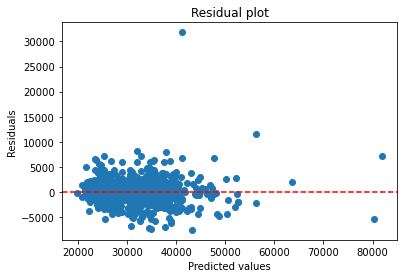

In [44]:
#Residuals plot

residuals = y_test_price - y_pred


plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.title('Residual plot')
plt.show()

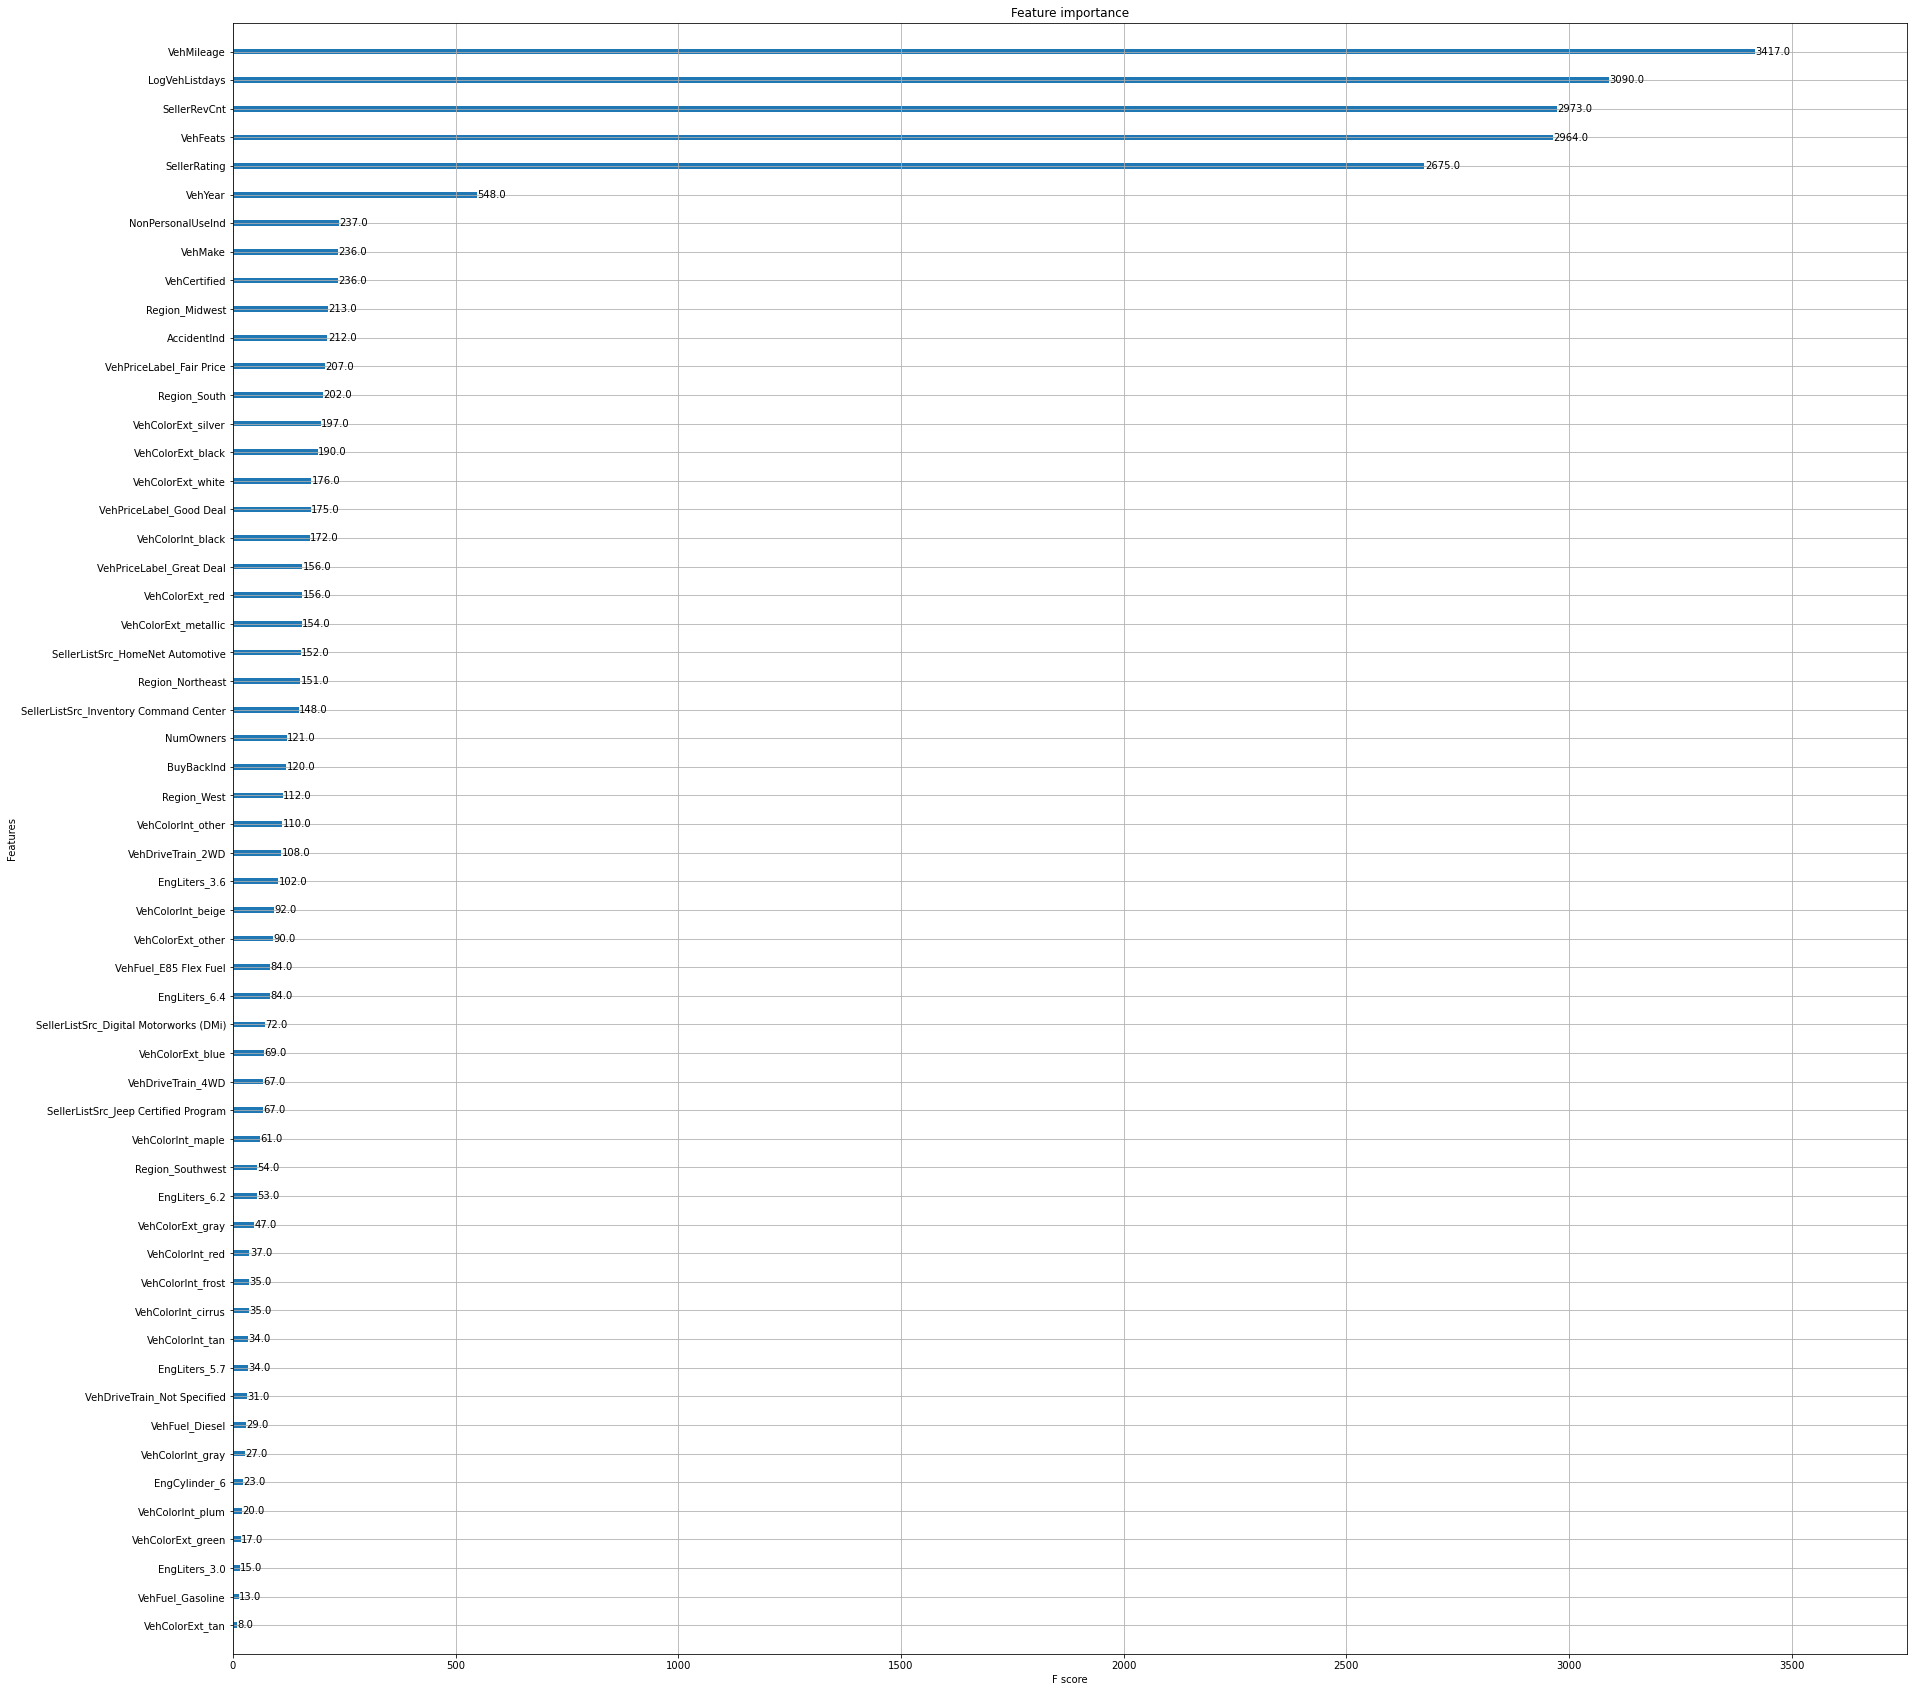

In [45]:
#Feature Importance Plot

fig, ax = plt.subplots(figsize=(30, 30))

xgb.plot_importance(best_estimator, ax=ax)
plt.show()

In [46]:
#X_test = df_test[training_cols];
#model.predict(X_test)

# Classification Model 

## Logistic Regression

In [47]:
log_reg = LogisticRegression(multi_class='ovr', solver = 'liblinear', max_iter = 1000, penalty = 'l1')

log_reg.fit(X_train_trim, y_train_trim)

y_pred_log = log_reg.predict(X_test_trim)

In [48]:
print(accuracy_score(y_train_trim, log_reg.predict(X_train_trim)))

0.629129734085415


0.6088939566704675


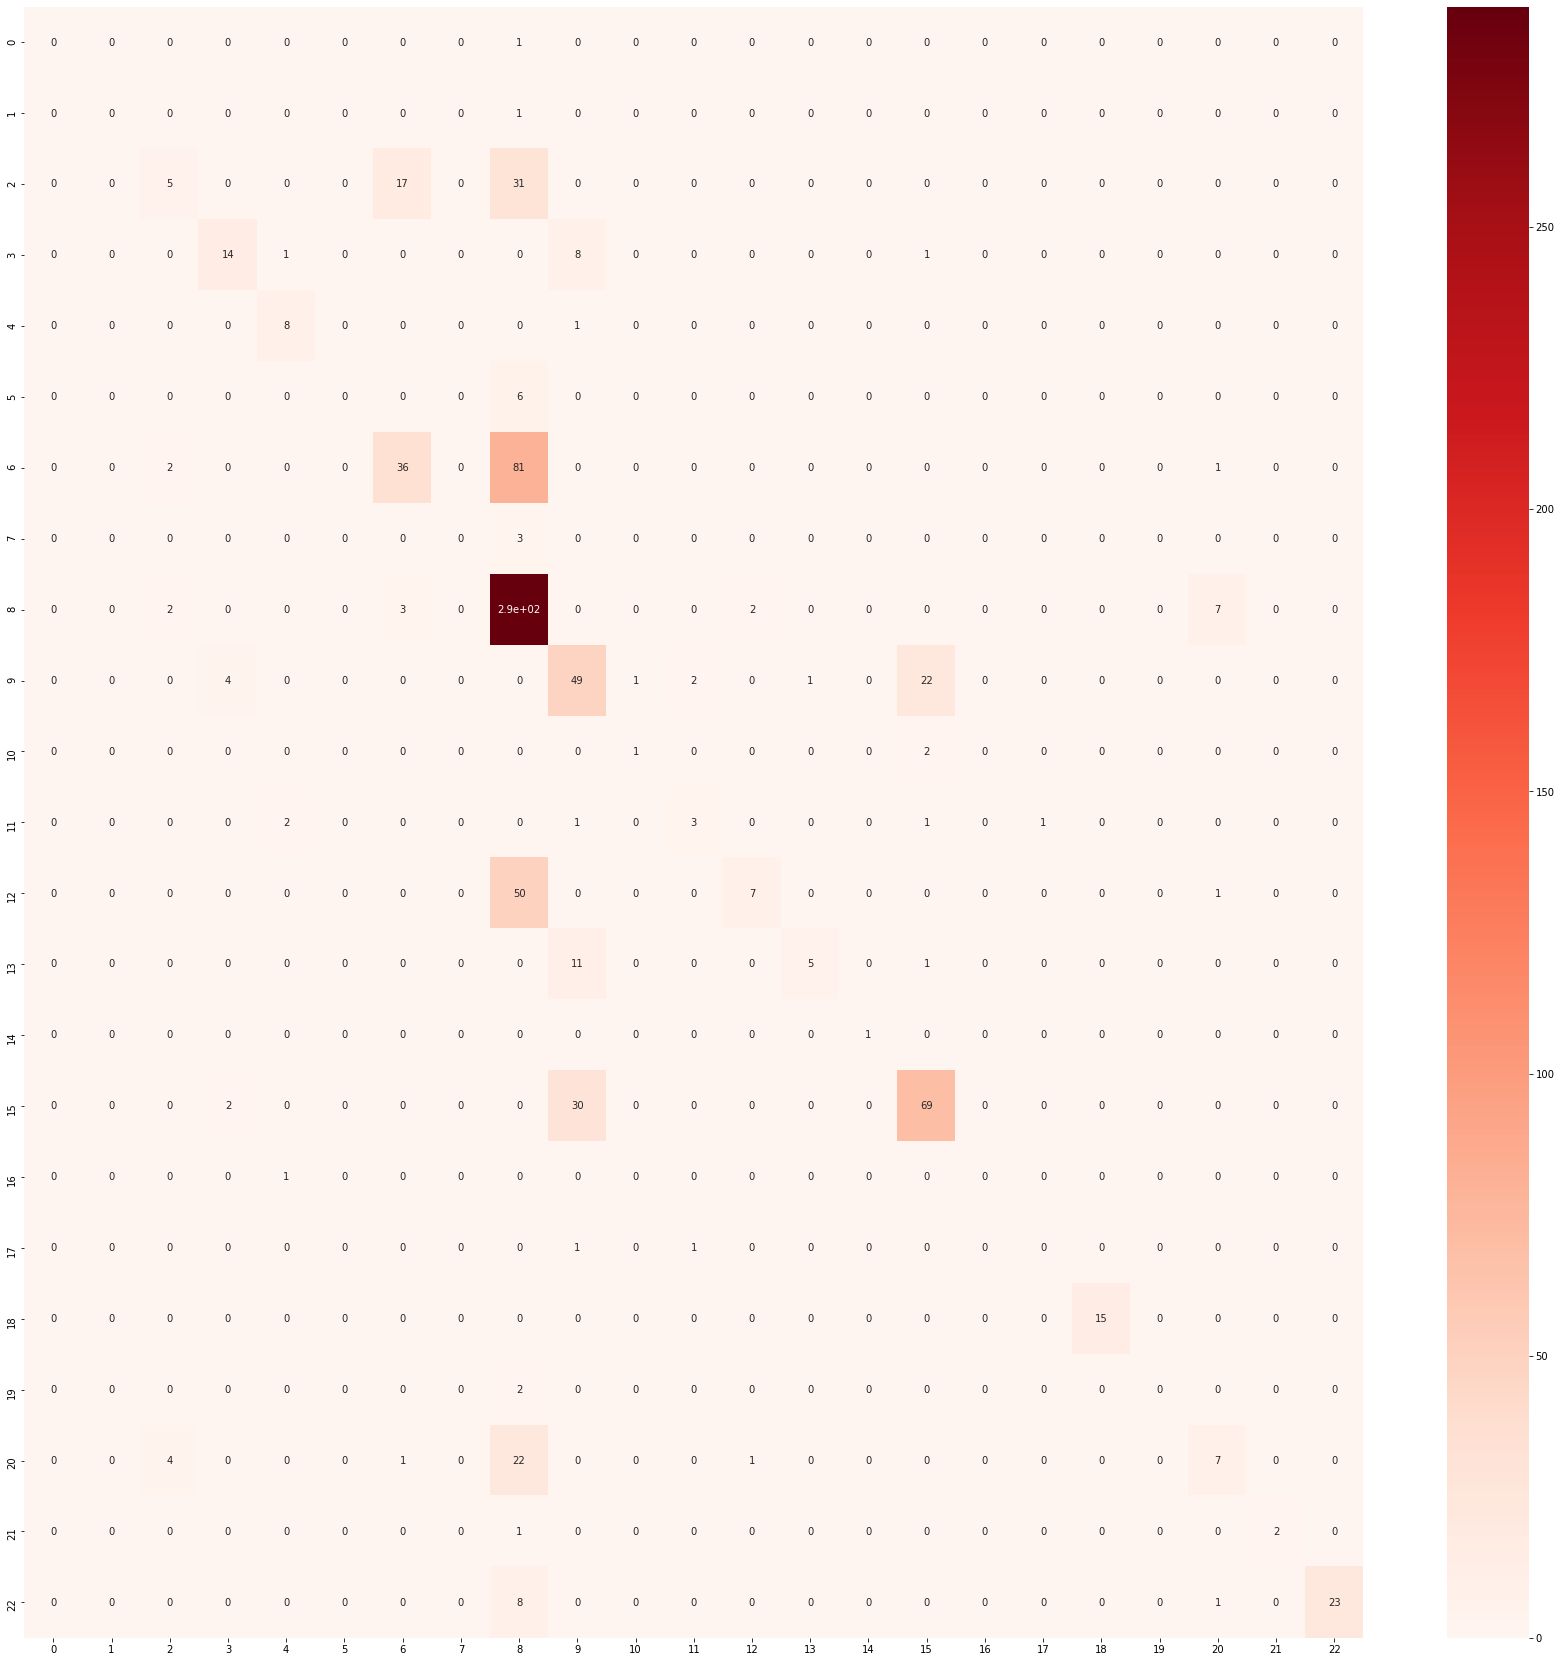

In [49]:
cm = confusion_matrix(y_test_trim, y_pred_log)

# Display confusion matrix
plt.subplots(figsize=(30, 30))
sns.heatmap(cm, annot=True, cmap='Reds')

print(accuracy_score(y_test_trim, y_pred_log))

## XGBoost Classifier 

In [50]:
# Train XGBoost classifier

## Holdout Sets trim 

X_train_trim, X_test_trim, y_train_trim, y_test_trim = train_test_split(X, y_trim_, test_size=0.2, random_state=2)


dtrain = xgb.DMatrix(X_train_trim, label=y_train_trim)

params = {'max_depth': 3, 'eta': 0.1, 'objective': 'multi:softprob', 'num_class': 29, 'eval_metric': 'mlogloss'}
num_round = 100

model = xgb.train(params, dtrain, num_round)

# Make predictions on test set
dtest = xgb.DMatrix(X_test_trim)

y_pred_prob = model.predict(dtest)


y_pred = np.argmax(y_pred_prob, axis = 1)



In [51]:
roc_auc_score(y_test_trim, y_pred_prob, multi_class = 'ovo', labels = list(range(0, 29)))

0.9858332943882903

In [52]:
accuracy_score(y_test_trim, y_pred)

0.8212147134302823

0.8212147134302823


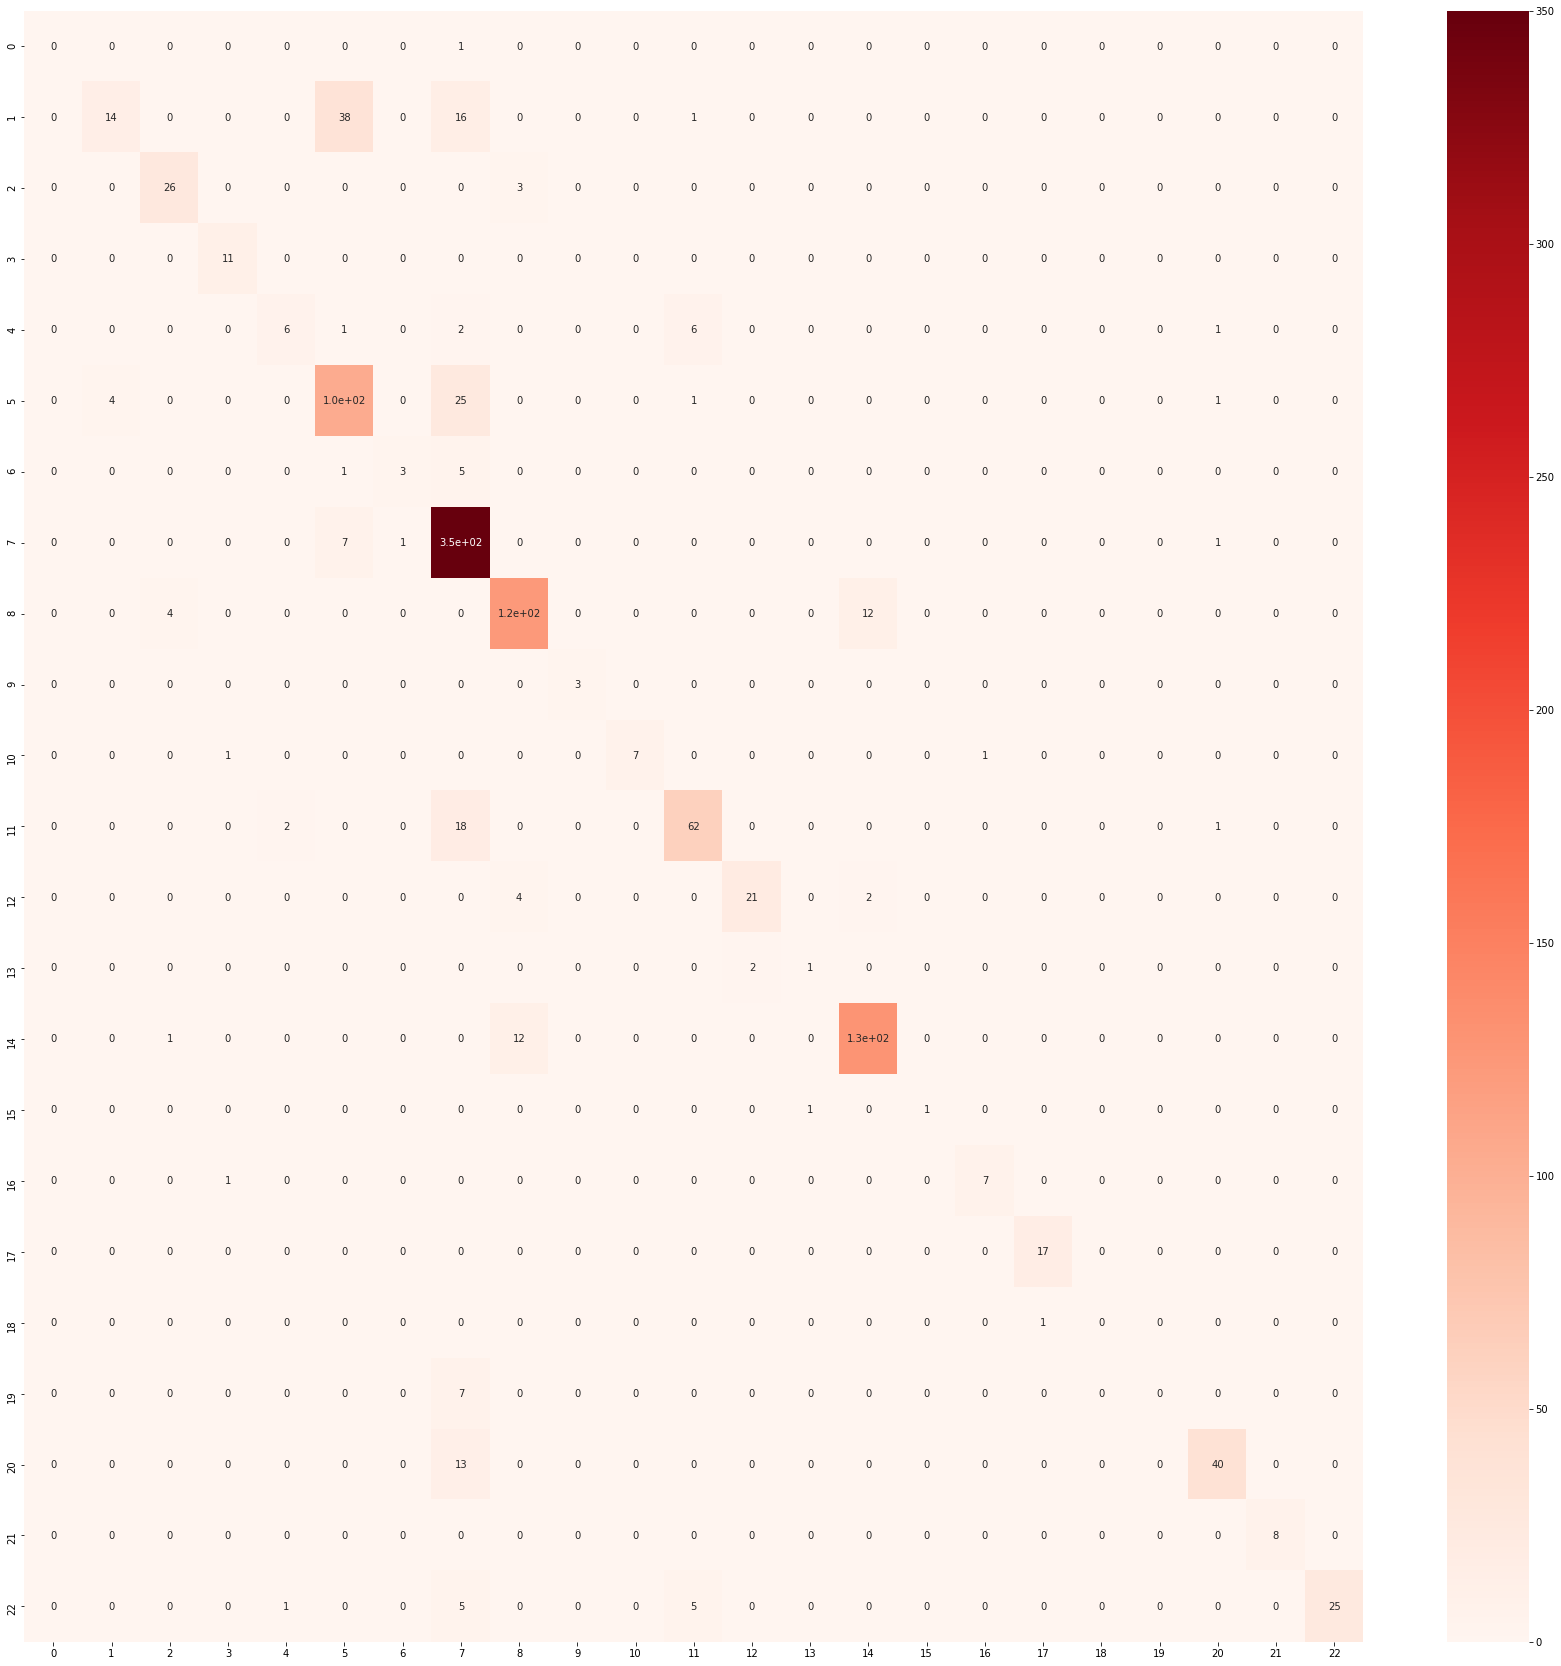

In [53]:

# Create confusion matrix
cm = confusion_matrix(y_test_trim, y_pred)

# Display confusion matrix
plt.subplots(figsize=(30, 30))
sns.heatmap(cm, annot=True, cmap='Reds')

print(accuracy_score(y_test_trim, y_pred))